# Main Submission

The code for feature 1 is explained in great detail with plenty of comments for each block of code. The code for feature 2, 3, 4 and 5 follows same steps. So the later codes have slightly fewer comments.

### import libs

In [237]:
#I use standard libs such as pandas numpy matplotlib.
#Feel free to hit Run All. It will take less than 5 mins- assuming all libs are installed

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm
%matplotlib inline
plt.style.use('fivethirtyeight')

The data file was larger than what github accepts. Kindly download it from here https://drive.google.com/file/d/1ZanTWpVlG7YaOm_wRv_fPvrs46SaWE_I/view?usp=sharing

In [1]:
#importing clean data from data_download notebook

import pickle
with open("data_final.pkl", "rb") as f:
  data_final = pickle.load(f)

In [2]:
data_final

,date,time,code,open,high,low,close,volume,amount,adjustflag
0,2022-04-01,20220401100000000,sh.600006,5.45,5.45,5.40,5.43,2019505.0,10960302.0000,3
1,2022-04-01,20220401103000000,sh.600006,5.43,5.47,5.43,5.46,983100.0,5359361.0000,3
2,2022-04-01,20220401110000000,sh.600006,5.46,5.48,5.43,5.46,854700.0,4667252.0000,3
3,2022-04-01,20220401113000000,sh.600006,5.46,5.47,5.44,5.44,712300.0,3887314.0000,3
4,2022-04-01,20220401133000000,sh.600006,5.44,5.45,5.43,5.43,481100.0,2616551.0000,3
...,...,...,...,...,...,...,...,...,...,...
635,2022-07-29,20220729113000000,sz.300699,70.34,70.69,70.00,70.07,553807.0,38977724.0000,3
636,2022-07-29,20220729133000000,sz.300699,70.03,70.03,69.30,69.60,432687.0,30084125.0000,3
637,2022-07-29,20220729140000000,sz.300699,69.70,69.96,69.60,69.75,243000.0,16955343.0000,3
638,2022-07-29,20220729143000000,sz.300699,69.73,70.88,69.66,70.88,751600.0,52897905.0000,3


## Feature 1

First Strategy I want to try is stochastic oscillator. I have had the opportunity to test this on daily data in US market, it worked okish. I am excited to see how it works on 30min data + Chinese market.

* Our feature is a ratio (Current Close - Lowest of n Period) / (Highest of n Period - Lowest of n Period) * 100

* If ratio is towards 100 then it means that the current close price is towards highest price seen over last n periods. So we take it as a sell signal. 

* If ratio is towards 0 it means that the current close price is towards lowest price seen over last n periods. So we take it as a buy signal


In [8]:
#create features for our strategy - stochastic oscillator
price_window = 14  #lookback periods to consider the highest/lowest prices
smoothing_window = 3
temp = []
for i in tqdm(data_final['code'].unique().tolist(), desc='Progress: '):

    #generate features for each stock
    stock = data_final[data_final['code'] == i].copy()
    stock['L14'] = stock['low'].rolling(window=price_window).min()
    stock['H14'] = stock['high'].rolling(window=price_window).max()
    stock['%k']  = (stock['close']-stock['L14'])/(stock['H14']-stock['L14'])*100
    stock['%D'] = stock['%k'].rolling(window = smoothing_window).mean()
    temp.append(stock)

# join all stocks get a single dataframe    
data_f1 = pd.concat(temp) 
data_f1.set_index(['time'],inplace=True) 
data_f1

Progress:   0%|          | 0/495 [00:00<?, ?it/s]

Progress: 100%|██████████| 495/495 [00:09<00:00, 53.12it/s]


,date,code,open,high,low,close,volume,amount,adjustflag,L14,H14,%k,%D
time,,,,,,,,,,,,,
20220401100000000,2022-04-01,sh.600006,5.45,5.45,5.40,5.43,2019505.0,10960302.0000,3,NaN,NaN,NaN,NaN
20220401103000000,2022-04-01,sh.600006,5.43,5.47,5.43,5.46,983100.0,5359361.0000,3,NaN,NaN,NaN,NaN
20220401110000000,2022-04-01,sh.600006,5.46,5.48,5.43,5.46,854700.0,4667252.0000,3,NaN,NaN,NaN,NaN
20220401113000000,2022-04-01,sh.600006,5.46,5.47,5.44,5.44,712300.0,3887314.0000,3,NaN,NaN,NaN,NaN
20220401133000000,2022-04-01,sh.600006,5.44,5.45,5.43,5.43,481100.0,2616551.0000,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220729113000000,2022-07-29,sz.300699,70.34,70.69,70.00,70.07,553807.0,38977724.0000,3,67.99,70.69,77.037037,74.674996
20220729133000000,2022-07-29,sz.300699,70.03,70.03,69.30,69.60,432687.0,30084125.0000,3,67.99,70.69,59.629630,76.880857
20220729140000000,2022-07-29,sz.300699,69.70,69.96,69.60,69.75,243000.0,16955343.0000,3,67.99,70.69,65.185185,67.283951


* Time to split data into in-sample and out-sample. However, since we have some missing data its possible 30 June 2022 or 1-July 2022 might be missing for some stocks. Let me check once, before I slice data into insample and outsample

In [9]:
x= []
for i in tqdm(data_f1['code'].unique().tolist(), desc='Progress: '):
    stock = data_f1[data_f1['code']==i]
    if '20220630150000000' not in stock.index or '20220701100000000' not in stock.index:
        print(i)
        x.append(i)
print(len(x))
#it should print 0



Progress: 100%|██████████| 495/495 [00:07<00:00, 61.98it/s]

0


* I will need list of all periods from start to end for in-sample and out-sample separately. It will be used later for indexing puproses. 


* But not all stocks have data for all periods. I will take a stock for which I know data for all periods are present.

In [10]:
backtest_timeperiod = data_f1.loc[data_f1['code']== 'sz.300699' ].index.to_list()
backtest_timeperiod_insample = backtest_timeperiod[:backtest_timeperiod.index('20220701100000000')]
backtest_timeperiod_outsample = backtest_timeperiod[backtest_timeperiod.index('20220701100000000'):]
print(len(backtest_timeperiod_insample), len(backtest_timeperiod_outsample))
#sum should add up to 640

472 168


* Now we can finally split data

In [11]:
in_sample = []
out_sample = []
for i in tqdm(data_f1['code'].unique().tolist(), desc='Progress: '):
    stock = data_f1[data_f1['code']==i]
    in_sample.append(stock[:'20220630150000000'])
    out_sample.append(stock['20220701100000000':])
data_f1_insample = pd.concat(in_sample)
data_f1_outsample = pd.concat(out_sample)
print(data_f1_insample.shape[0] + data_f1_outsample.shape[0])
#total rows should be 316656 same as original data

Progress: 100%|██████████| 495/495 [00:08<00:00, 59.81it/s]


316656


In [14]:
data_f1_insample

,date,code,open,high,low,close,volume,amount,adjustflag,L14,H14,%k,%D
time,,,,,,,,,,,,,
20220401100000000,2022-04-01,sh.600006,5.45,5.45,5.40,5.43,2019505.0,10960302.0000,3,NaN,NaN,NaN,NaN
20220401103000000,2022-04-01,sh.600006,5.43,5.47,5.43,5.46,983100.0,5359361.0000,3,NaN,NaN,NaN,NaN
20220401110000000,2022-04-01,sh.600006,5.46,5.48,5.43,5.46,854700.0,4667252.0000,3,NaN,NaN,NaN,NaN
20220401113000000,2022-04-01,sh.600006,5.46,5.47,5.44,5.44,712300.0,3887314.0000,3,NaN,NaN,NaN,NaN
20220401133000000,2022-04-01,sh.600006,5.44,5.45,5.43,5.43,481100.0,2616551.0000,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220630113000000,2022-06-30,sz.300699,59.80,59.86,59.21,59.56,585134.0,34823734.0000,3,57.69,59.86,86.175115,94.470046
20220630133000000,2022-06-30,sz.300699,59.55,59.55,58.91,59.33,588200.0,34808119.0000,3,57.69,59.86,75.576037,86.328725
20220630140000000,2022-06-30,sz.300699,59.27,59.41,59.04,59.29,324500.0,19229251.0000,3,57.69,59.86,73.732719,78.494624


## Backtesting Code
* Based on my interpretation of instructions- Everyday I put in 100 to buy a set of stocks. And the purchased stocks can be sold anytime in the future. 
* The following code is only for feature 1. And later in the notebook there is a common code for features 2, 3, 4 and 5. It is very similar to code below. 

* At many places I have used variables such as daily_df, daily_trades, daily_returns. But its actually period wise only. And not on daily level. There is no df on daily level, its all period(30min) wise data. Sorry for the confusion. I think it happened because mainly I have worked on daily data and it was first time working on minute wise data. I apologize once again for the inappropriate naming of variables in certain places. By the time I realized it was too late- (very close to submission deadline)

In [16]:

def backtesting_feature1(backtest_data , period, buy_threshold, sell_threshold):    
    buy_threshold  = buy_threshold
    sell_threshold = sell_threshold
    total_amt_invested = [] 
    fund_value = []  # market value of stocks which we are holding
    cash_from_selling = [] #cash I get from selling doesn't go back into trading capital. So this is my earning
    daily_trades = []  #a list of dataframes. Each dataframe stores all actions done and status after each period.
    daily_fund = 0  #daily fund which we have to make 100 at start of each day. 

    live_stock_inventory = pd.DataFrame(index = backtest_data['code'].unique().tolist(),columns=['qty'] ) #stores qty of all stocks present at any given time
    live_stock_inventory['qty'] = 0

    #Loop through all periods
    for time in tqdm(period, desc='Backtesting Progress: '):

        #initialize funds  as per given day and period
        #special code for day 1
        if len(total_amt_invested) < 1:       
            daily_fund = 100
            total_amt_invested.append(100)
            cash_from_selling.append(0)
            
        else:
            # if new day has started, add 100
            if backtest_data.loc[time]['date'][0] != old_date: 
                daily_fund = 100
                total_amt_invested.append(total_amt_invested[-1] + 100)
                cash_from_selling.append(0)
        
                
            #new period started but not new day
            else:
                daily_fund = 0
                total_amt_invested.append(total_amt_invested[-1])
                cash_from_selling.append(0)
              

        #generate buy/sell signal for all stocks for current period. Its called daily_df but its acutally period wise. By the time I realized the name was misrepresenting, it was too late. sorry. 
        daily_df = backtest_data.loc[time].copy() 
        daily_df.reset_index(inplace=True)
        daily_df.set_index(['code'] , inplace = True )
        daily_df['buy_signal'] = np.where((daily_df['%D'] <= buy_threshold) & (daily_df['%k'] > daily_df['%D']), 1, 0)
        daily_df['sell_signal'] = np.where((daily_df['%D'] >= sell_threshold) & (daily_df['%k'] < daily_df['%D']), 1, 0)
        
        #buy signal
        if daily_df['buy_signal'].sum()>=1 : 
            #buy signal + funds available. We buy
            if daily_fund ==100:
                        
                buy_stocks = daily_df[daily_df['buy_signal']==1][['close','%D']]
                #weighted distribution of funds. The stock further away from buy_threshold will get higher weight ( or more funds allocated)
                buy_stocks['abs_diff'] = (abs(buy_stocks['%D'].sub(   buy_threshold  ))) 
                buy_stocks['weight'] = buy_stocks['abs_diff'].div(    buy_stocks['abs_diff'].sum() ) 
                buy_stocks['fund_allocation'] = buy_stocks['weight'] * 100
                
                #for simplicity assumed fractional shares are allowed
                buy_stocks['buy_qty'] = buy_stocks['fund_allocation'].div(buy_stocks['close']) 
                
                #stocks purchased. So update inventory
                live_stock_inventory['qty'] = live_stock_inventory['qty'].add(buy_stocks['buy_qty'],fill_value=0) 
            
            else:
                pass

        #sell signal
        if daily_df['sell_signal'].sum()>=1:   
            #sell signal and stocks available in inventory. We sell. 
            if  live_stock_inventory['qty'].sum() > 0:
                
                sell_stocks = daily_df[daily_df['sell_signal']==1][['close']]
                
                #get qty for stocks which have sell signal
                sell_stocks  = pd.merge(sell_stocks, live_stock_inventory, left_index= True, right_index= True)
                cash_from_selling[-1] = np.dot(sell_stocks['close'],sell_stocks['qty'])

                #update stock inventory for stocks sold.
                for stock in sell_stocks.index.tolist():
                    if live_stock_inventory.loc[stock][0] > 0:
                        live_stock_inventory.loc[stock] =0 
            
            else:
                pass


        daily_df['qty'] = live_stock_inventory['qty'] 
        daily_df['market_value'] = daily_df['close'].multiply ( daily_df['qty'])
        daily_trades.append(daily_df)
        #during the period we might have done both actions - buy and sell. Our fund_value comes from qty of stocks after all actions(At end of period)
        #so its just a dot product of qty and close price columns at end of each period
        fund_value.append( (daily_df['market_value'].sum() ))

        #this variable is used to identify when a new day begins.
        old_date = backtest_data.loc[time]['date'][0] 
        
    
    return fund_value, total_amt_invested, cash_from_selling, daily_trades, live_stock_inventory 

In [232]:
fund_value, total_amt_invested, cash_from_selling, daily_trades, live_stock_inventory  = backtesting_feature1(data_f1_insample , backtest_timeperiod_insample,buy_threshold = 20, sell_threshold = 80 )


Backtesting Progress: 100%|██████████| 472/472 [00:10<00:00, 44.93it/s]


In [233]:
daily_trades_record = pd.concat(daily_trades)
datetime_index = pd.to_datetime(backtest_timeperiod_insample, format='%Y%m%d%H%M%S%f')
backtest_insample_results = pd.DataFrame({'fund_value':fund_value,
                                          'total_amt_invested':total_amt_invested,
                                          'cash_from_selling':cash_from_selling,
                                          }, index=datetime_index)
backtest_insample_results.index.name = 'time'
backtest_insample_results.head(15)

,fund_value,total_amt_invested,cash_from_selling
time,,,
2022-04-01 10:00:00,0.0,100,0.0
2022-04-01 10:30:00,0.0,100,0.0
2022-04-01 11:00:00,0.0,100,0.0
2022-04-01 11:30:00,0.0,100,0.0
2022-04-01 13:30:00,0.0,100,0.0
2022-04-01 14:00:00,0.0,100,0.0
2022-04-01 14:30:00,0.0,100,0.0
2022-04-01 15:00:00,0.0,100,0.0
2022-04-06 10:00:00,0.0,200,0.0


#### Calculating Returns for Each Period

Calculating period-wise returns when  1) we are actively investing 100 and 2) also selling shares - is not a straightforward task

In [75]:
daily_return = []
p = []
t = []

#we cant calculate return when we first buy stocks worth 100(fund value 0->100 ). Because then we will be dividing by zero. Infinite returns.
#so we start calculating on the very next day after purchasing stocks for the first time. Because then market value changes and we can calculate returns like 100->105, 5% return
#find index when we just bought first set of stocks or fund value = 100. And take the next day ( hence the "+1")
starting_index = backtest_insample_results['fund_value'].tolist().index(100) + 1
returns_index =  backtest_insample_results.index[starting_index:]
backtest_insample_results['shift'] = backtest_insample_results['total_amt_invested'] - backtest_insample_results['total_amt_invested'].shift(1)

for i in range(starting_index,len(backtest_insample_results)):

    previous = backtest_insample_results.iloc[i-1]['fund_value']
    
    today =0
    #when new funds are added. Those funds are not returns from market. So that component needs to be substracted while computing the returns
    if backtest_insample_results.iloc[i]['shift'] ==100:

        #when new funds are added + some stocks are sold. I need to include that cash from sellings. Its my earning from portfolio. Its a part of my fundvalue that I just withdrawn
        if backtest_insample_results.iloc[i]['cash_from_selling'] > 0:

            today= backtest_insample_results.iloc[i]['fund_value'] -100 + backtest_insample_results.iloc[i]['cash_from_selling']
        
        #new funds + no selling stocks. Simply subtract 100 as that is not part of returns from market
        else:
            
            today = backtest_insample_results.iloc[i]['fund_value']-100
    
    else:
        
        #no new funds + cash from selling stocks. Just add cashfrom selling stocks.
        if backtest_insample_results.iloc[i]['cash_from_selling'] > 0:
            
            today = backtest_insample_results.iloc[i]['fund_value'] +  backtest_insample_results.iloc[i]['cash_from_selling']
        
        #no new funds + no selling stocks. Do nothing
        else:    
            
            today = today = backtest_insample_results.iloc[i]['fund_value']

    daily_return.append(((today-previous)/previous)) 
    p.append(previous)
    t.append(today)       

daily_return_df = pd.DataFrame({'daily_R': daily_return,
                            'p':p,
                            't':t}, index= returns_index)
daily_return_df.index.name = 'time'
daily_return_df

,daily_R,p,t
time,,,
2022-04-07 10:30:00,-0.010900,100.000000,98.910049
2022-04-07 11:00:00,0.003166,98.910049,99.223169
2022-04-07 11:30:00,-0.006502,99.223169,98.577995
2022-04-07 13:30:00,-0.002399,98.577995,98.341523
2022-04-07 14:00:00,0.003505,98.341523,98.686200
...,...,...,...
2022-06-30 11:30:00,0.000256,359.958401,360.050574
2022-06-30 13:30:00,-0.002050,357.781291,357.047985
2022-06-30 14:00:00,-0.002475,323.736598,322.935266


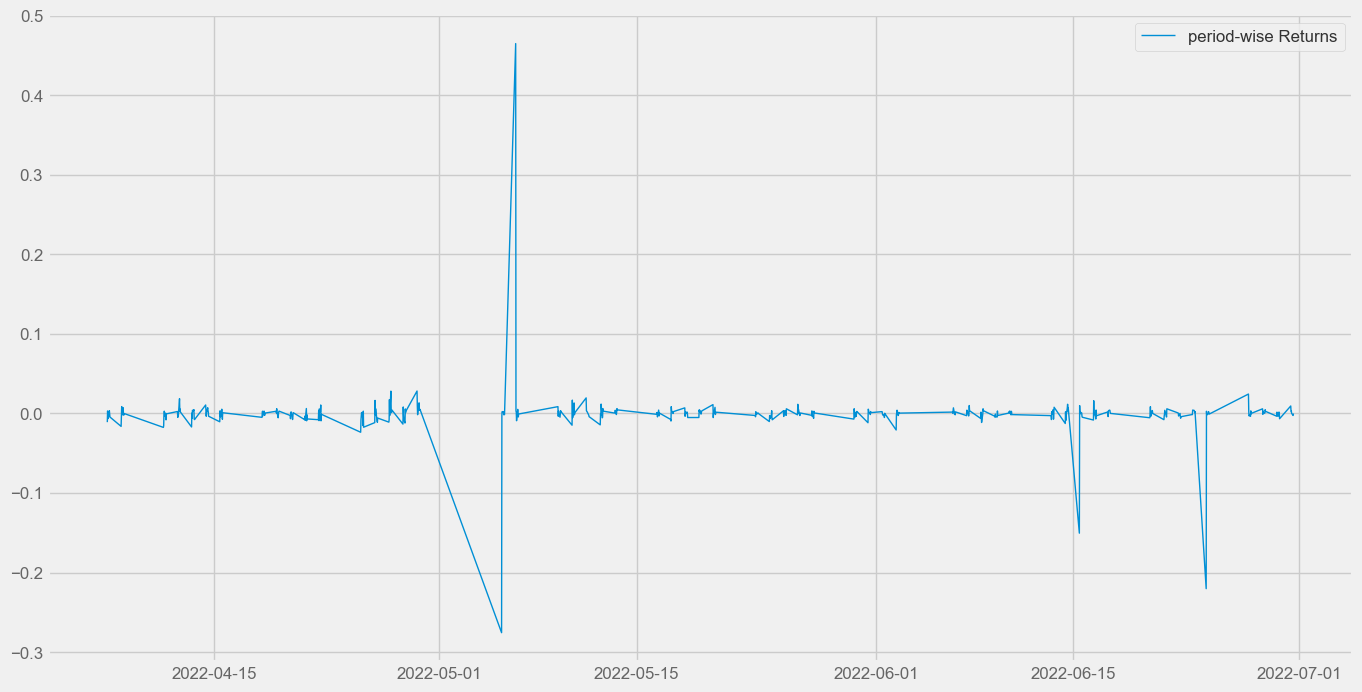

In [97]:
plt.figure(figsize=(15,8))
plt.plot(daily_return_df['daily_R'], linewidth =1, label = 'Periodic Returns')
plt.legend()
plt.grid(True)

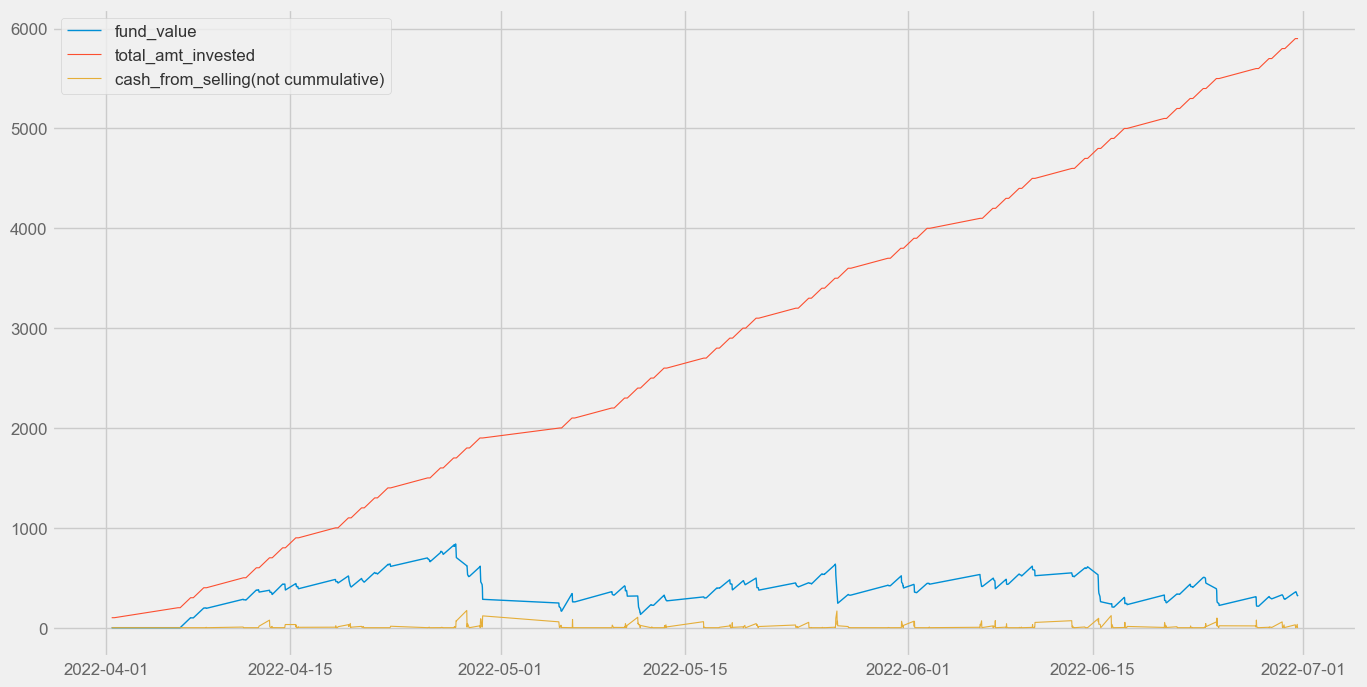

In [94]:
plt.figure(figsize=(15,8))
plt.plot(backtest_insample_results['fund_value'], linewidth =1, label = 'fund_value')
plt.plot(backtest_insample_results['total_amt_invested'], linewidth = 0.8, label= 'total_amt_invested')
plt.plot(backtest_insample_results['cash_from_selling'], linewidth = 0.8, label= 'cash_from_selling(not cummulative)')
plt.legend()
plt.grid(True)

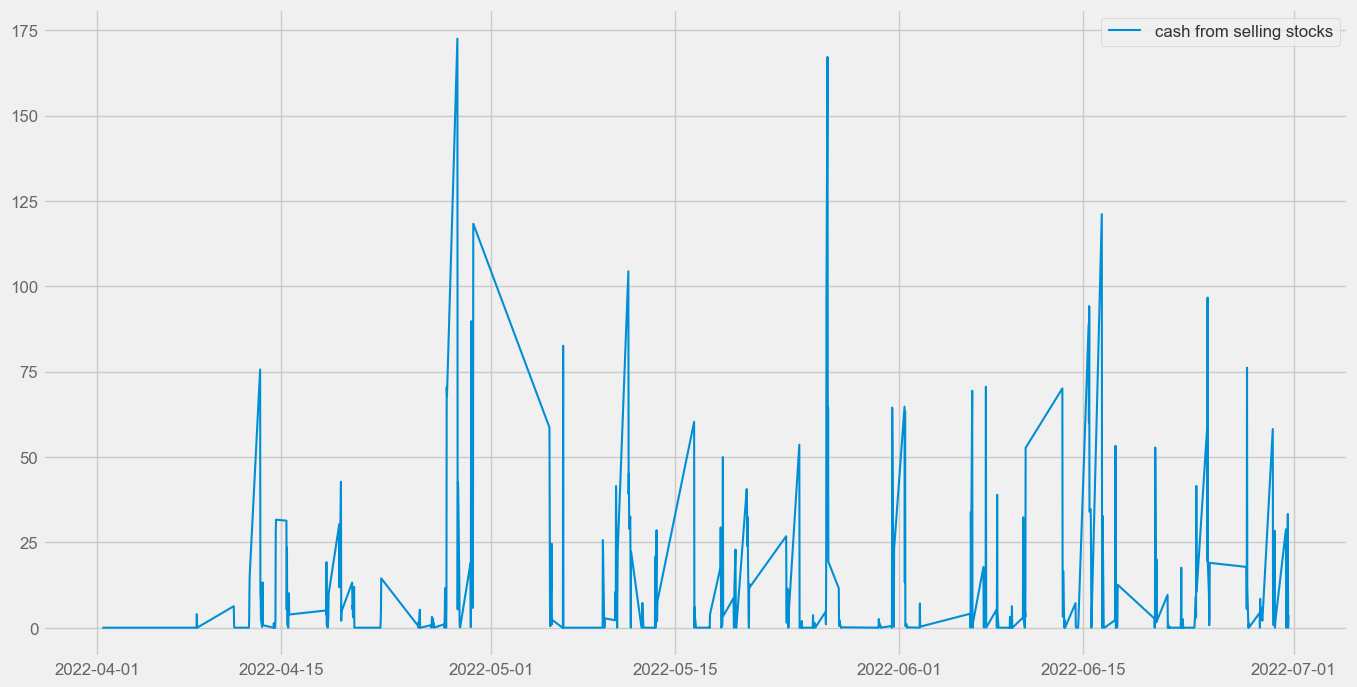

In [114]:
plt.figure(figsize=(15,8))
plt.plot(backtest_insample_results['cash_from_selling'], linewidth =1.5, label = 'cash from selling stocks')
plt.legend()
plt.grid(True)

In [238]:
print("Current holdings in market worth: ",round(backtest_insample_results['fund_value'][-1],2)  )
print("Total Cash collected from selling stocks ",round(backtest_insample_results['cash_from_selling'].sum(),2)  )
print("we traded over 59 days. So total amount invested is 5900. First 14 days when we had no signal the 100*2 was not allocated. So total 5700")

print("How much we made?: ", round(( ((backtest_insample_results['fund_value'][-1] + backtest_insample_results['cash_from_selling'].sum())/5700-1) )* 100,2),"%")
print("average of periodic returns: ", round(daily_return_df['daily_R'].mean()*100,2))
print( "std dev of periodic returns: ", round(daily_return_df['daily_R'].std(),2))
print("mean to std dev ratio: ", round(daily_return_df['daily_R'].mean()/daily_return_df['daily_R'].std(),2))

Current holdings in market worth:  315.63
Total Cash collected from selling stocks  5177.69
we traded over 59 days. So total amount invested is 5900. First 14 days when we had no signal the 100*2 was not allocated. So total 5700
How much we made?:  -3.63 %
average of periodic returns:  -0.05
std dev of periodic returns:  0.03
mean to std dev ratio:  -0.02


### Evaluation and Improvements
* The periodic returns looks very small. Except couple of sharp rise/falls.
* We should consider putting certain limits on losses to avoid hitting extremes which we witnissed
* The return/risk ratio is <0. So mostly our signals are not working well. Can try testing different values of threshold and pricewindow



### Test out-sample 
In-sample data should be used to find optimized parameters for given asset/market. In this case I have tried some combinations of different - buy_threshold, sell_threshold, price_window. 
And then test those finalized parameters on out-sample data to check that we did not overfit on in-sample data

In [118]:
fund_value, total_amt_invested, cash_from_selling, daily_trades, live_stock_inventory  = backtesting_feature1(data_f1_outsample , backtest_timeperiod_outsample,buy_threshold = 20, sell_threshold = 80 )
daily_trades_record = pd.concat(daily_trades)
datetime_index = pd.to_datetime(backtest_timeperiod_outsample, format='%Y%m%d%H%M%S%f')
backtest_outsample_results = pd.DataFrame({'fund_value':fund_value,
                                          'total_amt_invested':total_amt_invested,
                                          'cash_from_selling':cash_from_selling,
                                          }, index=datetime_index)
backtest_outsample_results.index.name = 'time'

print("Total amt invested: ",total_amt_invested[-1] )
print("Final amount", backtest_outsample_results['fund_value'][-1] + backtest_outsample_results['cash_from_selling'].sum())
print("How much we made?: ", round(( ((backtest_outsample_results['fund_value'][-1] + backtest_outsample_results['cash_from_selling'].sum())/total_amt_invested[-1]-1) )* 100,2),"%")


Backtesting Progress:   0%|          | 0/168 [00:00<?, ?it/s]

Backtesting Progress: 100%|██████████| 168/168 [00:02<00:00, 72.43it/s]

Total amt invested:  2100
final amount 2095.5060855610345
How much we made?:  -0.21 %


## Backtesting Code for Features 2, 3, 4 and 5

Backtesting Code for Feature 1 is slight modified. Otherwise we would have one backtesting code for all 5 features

In [32]:

def backtesting_feature(backtest_data,period ):    
    total_amt_invested = []
    fund_value = []  # market value of stocks which we are holding
    cash_from_selling = [] #cash I get from selling doesn't go back into trading capital. So this is my earning
    daily_trades = []  #a list of dataframes. Each dataframe stores all actions done and status after each period.
    daily_fund = 0  #daily fund which we have to make 100 at start of each day. 

    #stores qty of all stocks present at any given time
    live_stock_inventory = pd.DataFrame(index = backtest_data['code'].unique().tolist(),columns=['qty'] ) 
    live_stock_inventory['qty'] = 0

    for time in tqdm(period, desc='Backtesting Progress: '):

        #initialize funds  as per given day and period
        #special block for day 1
        if len(total_amt_invested) < 1:       
            daily_fund = 100
            total_amt_invested.append(100)
            cash_from_selling.append(0)
            
        else:
            # if new day has started, add 100
            if backtest_data.loc[time]['date'][0] != old_date: 
                daily_fund = 100
                total_amt_invested.append(total_amt_invested[-1] + 100)
                cash_from_selling.append(0)
                # fund_value.append(0)
                
            #new period started but not new day
            else:
                daily_fund = 0
                total_amt_invested.append(total_amt_invested[-1])
                cash_from_selling.append(0)
                # fund_value.append(0)


        #generate buy/sell signal for all stocks for current period
        daily_df = backtest_data.loc[time].copy() #gets stock data for current period
        daily_df.reset_index(inplace=True)
        daily_df.set_index(['code'] , inplace = True )
        daily_df['buy_signal'] = np.where(daily_df['close'] <= daily_df['Lower_Band'], 1, 0)
        daily_df['sell_signal'] = np.where(daily_df['close'] > daily_df['Upper_Band'], 1, 0)
        
        #buy signal
        if daily_df['buy_signal'].sum()>=1 : 
            #buy signal + funds available. We buy
            if daily_fund ==100:
                        
                buy_stocks = daily_df[daily_df['buy_signal']==1][['close','Lower_Band']]
                #weighted distribution of funds. The stock further away from Lower_Band will get higher weight ( and more funds allocated)
                buy_stocks['abs_diff'] = (abs(buy_stocks['close'].sub( buy_stocks['Lower_Band']  ))) 
                buy_stocks['weight'] = buy_stocks['abs_diff'].div(    buy_stocks['abs_diff'].sum() ) 
                buy_stocks['fund_allocation'] = buy_stocks['weight'] * 100
                buy_stocks['buy_qty'] = buy_stocks['fund_allocation'].div(buy_stocks['close'])
                #stocks purchased. So update inventory
                live_stock_inventory['qty'] = live_stock_inventory['qty'].add(buy_stocks['buy_qty'],fill_value=0) 
            
            else:
                pass

        #sell signal
        if daily_df['sell_signal'].sum()>=1:   
            #sell signal and stocks available in inventory. We sell. 
            if  live_stock_inventory['qty'].sum() > 0:
                
                sell_stocks = daily_df[daily_df['sell_signal']==1][['close']]

                #get qty present for stocks that have sell signals.
                sell_stocks  = pd.merge(sell_stocks, live_stock_inventory, left_index= True, right_index= True)
                
                #save earnings from selling stocks in a list
                cash_from_selling[-1] = np.dot(sell_stocks['close'],sell_stocks['qty'])
                
                #update stock inventory for stocks sold.
                for stock in sell_stocks.index.tolist():
                    if live_stock_inventory.loc[stock][0] > 0:
                        live_stock_inventory.loc[stock] =0 
            
            else:
                pass


        daily_df['qty'] = live_stock_inventory['qty'] 
        daily_df['market_value'] = daily_df['close'].multiply ( daily_df['qty'])
        daily_trades.append(daily_df)
        fund_value.append( (daily_df['market_value'].sum() ))

        old_date = backtest_data.loc[time]['date'][0] 
        
    
    return fund_value, total_amt_invested, cash_from_selling, daily_trades, live_stock_inventory 

## Periodic Returns Function
common code for feature 2, 3, 4 and 5

In [47]:
def calculate_daily_returns(backtest_results):
    daily_return = []
    p = []
    t = []
    starting_index = backtest_results['fund_value'].tolist().index(100) + 1
    returns_index =  backtest_results.index[starting_index:]
    backtest_results['shift'] = backtest_results['total_amt_invested'] - backtest_results['total_amt_invested'].shift(1)

    #we cant calculate return when we first buy stocks worth 100(fund value 0->100 ). Because then we will be dividing by zero. Infinite results
    #so we start calculating on the very next day after purchasing stocks for the first time. Because then market value changes and we can calculate returns like 100->105, 5% return
    for i in range(starting_index,len(backtest_results)):

        previous = backtest_results.iloc[i-1]['fund_value']
        
        today =0

        if backtest_results.iloc[i]['shift'] ==100:

            if backtest_results.iloc[i]['cash_from_selling'] > 0:

                today= backtest_results.iloc[i]['fund_value'] -100 + backtest_results.iloc[i]['cash_from_selling']
            
            else:
                
                today = backtest_results.iloc[i]['fund_value']-100
        
        else:
            
            if backtest_results.iloc[i]['cash_from_selling'] > 0:
                
                today = backtest_results.iloc[i]['fund_value'] +  backtest_results.iloc[i]['cash_from_selling']
            
            else:    
                
                today = today = backtest_results.iloc[i]['fund_value']

        daily_return.append(((today-previous)/previous)) 
        p.append(previous)
        t.append(today)       

    daily_return_df = pd.DataFrame({'daily_R': daily_return,
                                'p':p,
                                't':t}, index= returns_index)
    daily_return_df.index.name = 'time'
    
    return daily_return_df

## Feature 2

* The idea is to calculate rolling mean. Then calculate a lower and upper band around it. Which would be made of +2 std dev and -2 std dev of prices
* If prices fall below -2 Stddev it means its bound to revert up to mean. this is a buy signal
* If prices go above +2 Stddev it means its bound to revert down to mean. this is a sell signal

In [173]:
#we only have to edit this piece of block. to get desired features as per strategy. Rest everything runs same.
window = 8
buy_sigma_multiplier = 2
sell_sigma_multiplier = 2
temp = []
for i in tqdm(data_final['code'].unique().tolist(), desc='Progress: '):
    stock = data_final[data_final['code'] == i].copy()
    stock['mean'] = stock['close'].rolling(window=window).mean()
    stock['Upper_Band'] =  stock['mean'] + stock['close'].rolling(window=window).std()*sell_sigma_multiplier
    stock['Lower_Band']  = stock['mean'] - stock['close'].rolling(window=window).std()*buy_sigma_multiplier
  
    temp.append(stock)
data_f2 = pd.concat(temp) 
data_f2.set_index(['time'],inplace=True) 
data_f2

Progress:   0%|          | 0/495 [00:00<?, ?it/s]

Progress: 100%|██████████| 495/495 [00:09<00:00, 51.21it/s]


,date,code,open,high,low,close,volume,amount,adjustflag,mean,Upper_Band,Lower_Band
time,,,,,,,,,,,,
20220401100000000,2022-04-01,sh.600006,5.45,5.45,5.40,5.43,2019505.0,10960302.0000,3,NaN,NaN,NaN
20220401103000000,2022-04-01,sh.600006,5.43,5.47,5.43,5.46,983100.0,5359361.0000,3,NaN,NaN,NaN
20220401110000000,2022-04-01,sh.600006,5.46,5.48,5.43,5.46,854700.0,4667252.0000,3,NaN,NaN,NaN
20220401113000000,2022-04-01,sh.600006,5.46,5.47,5.44,5.44,712300.0,3887314.0000,3,NaN,NaN,NaN
20220401133000000,2022-04-01,sh.600006,5.44,5.45,5.43,5.43,481100.0,2616551.0000,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20220729113000000,2022-07-29,sz.300699,70.34,70.69,70.00,70.07,553807.0,38977724.0000,3,69.74625,70.552223,68.940277
20220729133000000,2022-07-29,sz.300699,70.03,70.03,69.30,69.60,432687.0,30084125.0000,3,69.71875,70.528225,68.909275
20220729140000000,2022-07-29,sz.300699,69.70,69.96,69.60,69.75,243000.0,16955343.0000,3,69.72250,70.532280,68.912720


In [174]:
in_sample = []
out_sample = []
for i in tqdm(data_f2['code'].unique().tolist(), desc='Progress: '):
    stock = data_f2[data_f2['code']==i]
    in_sample.append(stock[:'20220630150000000'])
    out_sample.append(stock['20220701100000000':])
data_f2_insample = pd.concat(in_sample)
data_f2_outsample = pd.concat(out_sample)
print(data_f2_insample.shape[0] + data_f2_outsample.shape[0])

Progress: 100%|██████████| 495/495 [00:08<00:00, 58.35it/s]


316656


In [175]:
fund_value_f2, total_amt_invested_f2, cash_from_selling_f2, daily_trades_f2, live_stock_inventory_f2  = backtesting_feature(data_f2_insample, backtest_timeperiod_insample)
daily_trades_record_f2 = pd.concat(daily_trades_f2)

Backtesting Progress:   0%|          | 0/472 [00:00<?, ?it/s]

Backtesting Progress: 100%|██████████| 472/472 [00:10<00:00, 46.56it/s]


In [176]:
datetime_index = pd.to_datetime(backtest_timeperiod_insample, format='%Y%m%d%H%M%S%f')
backtest_insample_results_f2 = pd.DataFrame({'fund_value':fund_value_f2,
                                          'total_amt_invested':total_amt_invested_f2,
                                          'cash_from_selling':cash_from_selling_f2,
                                          }, index=datetime_index)
backtest_insample_results_f2.index.name = 'time'


In [207]:
backtest_insample_results_f2.head(10)

,fund_value,total_amt_invested,cash_from_selling,shift
time,,,,
2022-04-01 10:00:00,0.000000,100,0.0,NaN
2022-04-01 10:30:00,0.000000,100,0.0,0.0
2022-04-01 11:00:00,0.000000,100,0.0,0.0
2022-04-01 11:30:00,0.000000,100,0.0,0.0
2022-04-01 13:30:00,0.000000,100,0.0,0.0
2022-04-01 14:00:00,0.000000,100,0.0,0.0
2022-04-01 14:30:00,0.000000,100,0.0,0.0
2022-04-01 15:00:00,0.000000,100,0.0,0.0
2022-04-06 10:00:00,100.000000,200,0.0,100.0


In [178]:
daily_return_df_f2 = calculate_daily_returns(backtest_insample_results_f2)
daily_return_df_f2

,daily_R,p,t
time,,,
2022-04-06 10:30:00,-0.014833,100.000000,98.516748
2022-04-06 11:00:00,0.002766,98.516748,98.789242
2022-04-06 11:30:00,-0.000492,98.789242,98.740674
2022-04-06 13:30:00,-0.001559,98.740674,98.586785
2022-04-06 14:00:00,-0.001701,98.586785,98.419062
...,...,...,...
2022-06-30 11:30:00,0.005815,513.485001,516.470823
2022-06-30 13:30:00,0.010310,510.510228,515.773515
2022-06-30 14:00:00,-0.002638,511.412298,510.063274


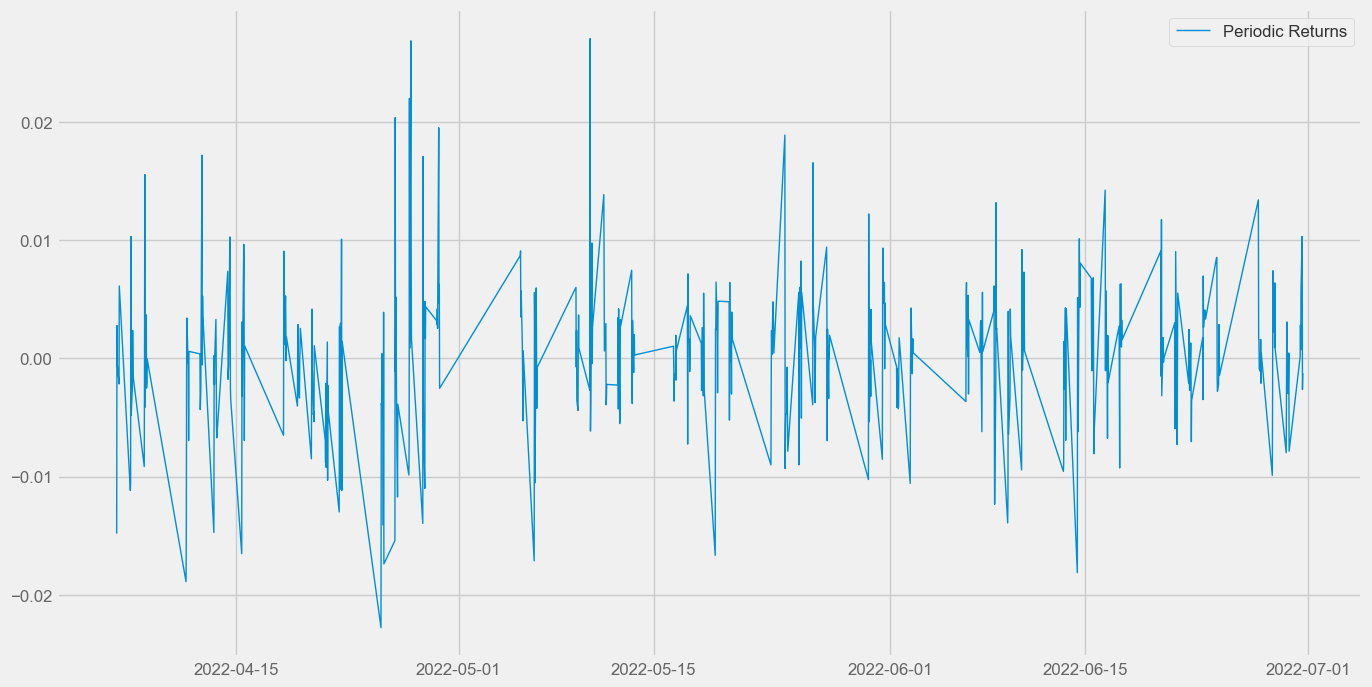

In [179]:
plt.figure(figsize=(15,8))
plt.plot(daily_return_df_f2['daily_R'], linewidth =1, label = 'Periodic Returns')
plt.legend()
plt.grid(True)

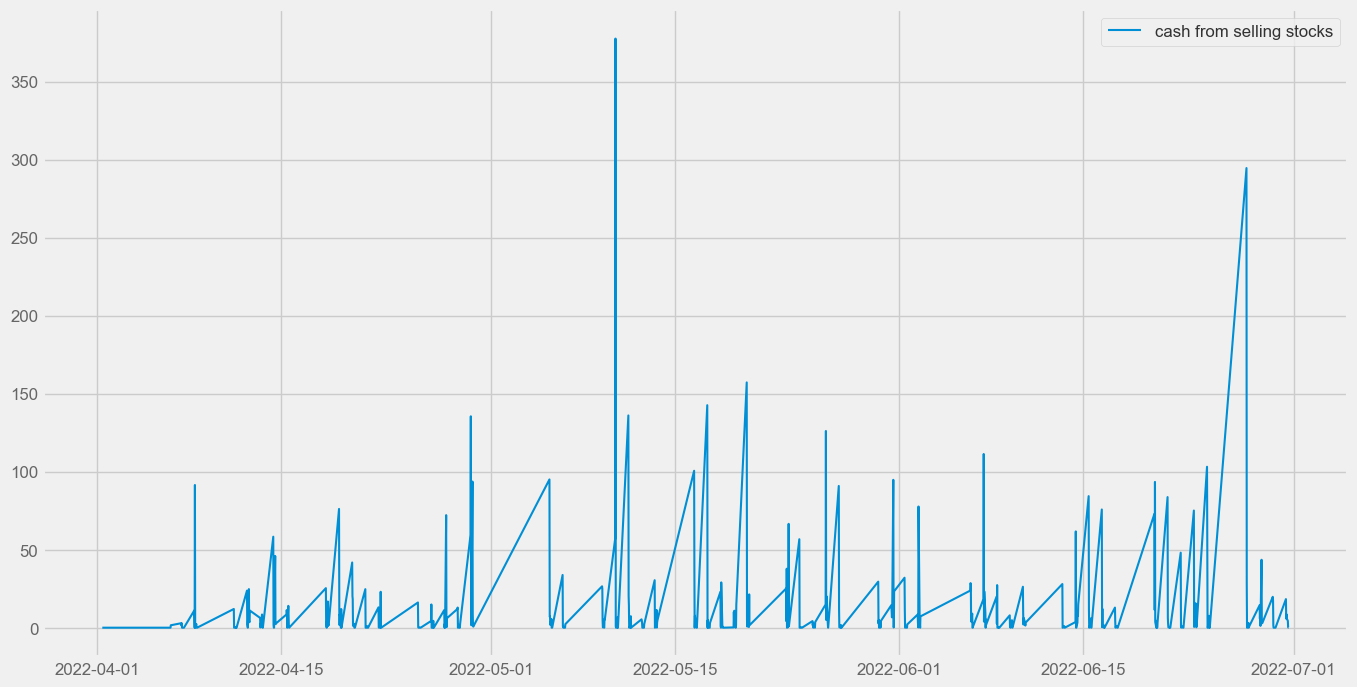

In [180]:
plt.figure(figsize=(15,8))
plt.plot(backtest_insample_results_f2['cash_from_selling'], linewidth =1.5, label = 'cash from selling stocks')
plt.legend()
plt.grid(True)

In [239]:
print("Current holdings in market worth: ",round(backtest_insample_results_f2['fund_value'][-1],2)  )
print("Total Cash collected from selling stocks ",round(backtest_insample_results_f2['cash_from_selling'].sum(),2)  )
print("Total amt invested about: ",total_amt_invested_f2[-1]-100)
print("How much we made?: ", round(( ((backtest_insample_results_f2['fund_value'][-1] + backtest_insample_results_f2['cash_from_selling'].sum())/(total_amt_invested_f2[-1]-100)-1) )* 100,2),"%")
print("average of periodic returns: ", round(daily_return_df_f2['daily_R'].mean()*100,2))
print( "std dev of periodic returns: ", round(daily_return_df_f2['daily_R'].std(),2))
print("mean to std dev ratio: ", round(daily_return_df_f2['daily_R'].mean()/daily_return_df_f2['daily_R'].std(),2))

Current holdings in market worth:  508.35
Total Cash collected from selling stocks  5357.42
Total amt invested about:  5800
How much we made?:  1.13 %
average of periodic returns:  0.01
std dev of periodic returns:  0.01
mean to std dev ratio:  0.01


### Evaluation and Improvements
* Positive Returns!
* The periodic returns looks very jagged 
*  We can try to check returns per trade to see if returns can be improved. Also see if we are taking way too many trades-resulting in more fluctuations in returns




### Test Out-Sample

In [182]:
fund_value_f2_o, total_amt_invested_f2_o, cash_from_selling_f2_o, daily_trades_f2_o, live_stock_inventory_f2_o  = backtesting_feature(data_f2_outsample , backtest_timeperiod_outsample )
daily_trades_record = pd.concat(daily_trades_f2_o)
datetime_index = pd.to_datetime(backtest_timeperiod_outsample, format='%Y%m%d%H%M%S%f')
backtest_outsample_results_f2_o = pd.DataFrame({'fund_value':fund_value_f2_o,
                                          'total_amt_invested':total_amt_invested_f2_o,
                                          'cash_from_selling':cash_from_selling_f2_o,
                                          }, index=datetime_index)
backtest_outsample_results_f2_o.index.name = 'time'

print("Total amt invested: ",total_amt_invested_f2_o[-1] )
print("Final amount", backtest_outsample_results_f2_o['fund_value'][-1] + backtest_outsample_results_f2_o['cash_from_selling'].sum())
print("How much we made?: ", round(( ((backtest_outsample_results_f2_o['fund_value'][-1] + backtest_outsample_results_f2_o['cash_from_selling'].sum())/total_amt_invested_f2_o[-1]-1) )* 100,2),"%")


Backtesting Progress: 100%|██████████| 168/168 [00:01<00:00, 87.24it/s]

Total amt invested:  2100
Final amount 2095.3444301375794
How much we made?:  -0.22 %


## Feature 3
* Our feature is VWAP - volume weighted average price and +/2 StdDev bands around it



In [146]:
#create features for our strategy 
window = 8
buy_sigma_multiplier = 2
sell_sigma_multiplier = 2
temp = []
for i in tqdm(data_final['code'].unique().tolist(), desc='Progress: '):
    stock = data_final[data_final['code'] == i].copy()
    stock['VolPrice'] = ((stock['close'] + stock['low'] + stock['high']) / 3 ).multiply(stock['volume'])
    stock['VolPriceSum'] = stock['VolPrice'].rolling(window = window).sum()
    stock['VolSum'] = stock['volume'].rolling(window = window).sum()
    stock['vwap'] = stock['VolPriceSum'].div(stock['VolSum'])
    stock['Upper_Band'] =  stock['vwap'] + stock['close'].rolling(window=window).std()*sell_sigma_multiplier
    stock['Lower_Band']  = stock['vwap'] - stock['close'].rolling(window=window).std()*buy_sigma_multiplier
    temp.append(stock)
data_f3 = pd.concat(temp) 
data_f3.set_index(['time'],inplace=True) 
data_f3

Progress: 100%|██████████| 495/495 [00:09<00:00, 50.60it/s]


,date,code,open,high,low,close,volume,amount,adjustflag,VolPrice,VolPriceSum,VolSum,vwap,Upper_Band,Lower_Band
time,,,,,,,,,,,,,,,
20220401100000000,2022-04-01,sh.600006,5.45,5.45,5.40,5.43,2019505.0,10960302.0000,3,1.095918e+07,NaN,NaN,NaN,NaN,NaN
20220401103000000,2022-04-01,sh.600006,5.43,5.47,5.43,5.46,983100.0,5359361.0000,3,5.361172e+06,NaN,NaN,NaN,NaN,NaN
20220401110000000,2022-04-01,sh.600006,5.46,5.48,5.43,5.46,854700.0,4667252.0000,3,4.663813e+06,NaN,NaN,NaN,NaN,NaN
20220401113000000,2022-04-01,sh.600006,5.46,5.47,5.44,5.44,712300.0,3887314.0000,3,3.882035e+06,NaN,NaN,NaN,NaN,NaN
20220401133000000,2022-04-01,sh.600006,5.44,5.45,5.43,5.43,481100.0,2616551.0000,3,2.615580e+06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220729113000000,2022-07-29,sz.300699,70.34,70.69,70.00,70.07,553807.0,38977724.0000,3,3.890679e+07,3.450996e+08,4957747.0,69.608157,70.414131,68.802184
20220729133000000,2022-07-29,sz.300699,70.03,70.03,69.30,69.60,432687.0,30084125.0000,3,3.013376e+07,3.401188e+08,4886034.0,69.610394,70.419869,68.800919
20220729140000000,2022-07-29,sz.300699,69.70,69.96,69.60,69.75,243000.0,16955343.0000,3,1.695411e+07,3.317476e+08,4766034.0,69.606629,70.416409,68.796850


In [147]:
in_sample = []
out_sample = []
for i in tqdm(data_f3['code'].unique().tolist(), desc='Progress: '):
    stock = data_f3[data_f3['code']==i]
    in_sample.append(stock[:'20220630150000000'])
    out_sample.append(stock['20220701100000000':])
data_f3_insample = pd.concat(in_sample)
data_f3_outsample = pd.concat(out_sample)
print(data_f3_insample.shape[0] + data_f3_outsample.shape[0])

Progress: 100%|██████████| 495/495 [00:08<00:00, 61.36it/s]


316656


In [148]:
fund_value_f3, total_amt_invested_f3, cash_from_selling_f3, daily_trades_f3, live_stock_inventory_f3  = backtesting_feature(data_f3_insample, backtest_timeperiod_insample)
daily_trades_record_f3 = pd.concat(daily_trades_f3)

Backtesting Progress:   0%|          | 0/472 [00:00<?, ?it/s]

Backtesting Progress: 100%|██████████| 472/472 [00:09<00:00, 49.15it/s]


In [210]:
datetime_index = pd.to_datetime(backtest_timeperiod_insample, format='%Y%m%d%H%M%S%f')
backtest_insample_results_f3 = pd.DataFrame({'fund_value':fund_value_f3,
                                          'total_amt_invested':total_amt_invested_f3,
                                          'cash_from_selling':cash_from_selling_f3,
                                          }, index=datetime_index)
backtest_insample_results_f3.index.name = 'time'
backtest_insample_results_f3.head(15)

,fund_value,total_amt_invested,cash_from_selling
time,,,
2022-04-01 10:00:00,0.000000,100,0.000000
2022-04-01 10:30:00,0.000000,100,0.000000
2022-04-01 11:00:00,0.000000,100,0.000000
2022-04-01 11:30:00,0.000000,100,0.000000
2022-04-01 13:30:00,0.000000,100,0.000000
2022-04-01 14:00:00,0.000000,100,0.000000
2022-04-01 14:30:00,0.000000,100,0.000000
2022-04-01 15:00:00,0.000000,100,0.000000
2022-04-06 10:00:00,100.000000,200,0.000000


In [150]:
daily_return_df_f3 = calculate_daily_returns(backtest_insample_results_f3)
daily_return_df_f3

,daily_R,p,t
time,,,
2022-04-06 10:30:00,-0.008283,100.000000,99.171692
2022-04-06 11:00:00,0.008283,99.171692,99.993113
2022-04-06 11:30:00,0.001686,99.993113,100.161718
2022-04-06 13:30:00,-0.000869,100.161718,100.074681
2022-04-06 14:00:00,0.000595,100.052399,100.111949
...,...,...,...
2022-06-30 11:30:00,0.005293,881.534431,886.200622
2022-06-30 13:30:00,0.006560,859.167565,864.803958
2022-06-30 14:00:00,-0.001956,861.448007,859.762827


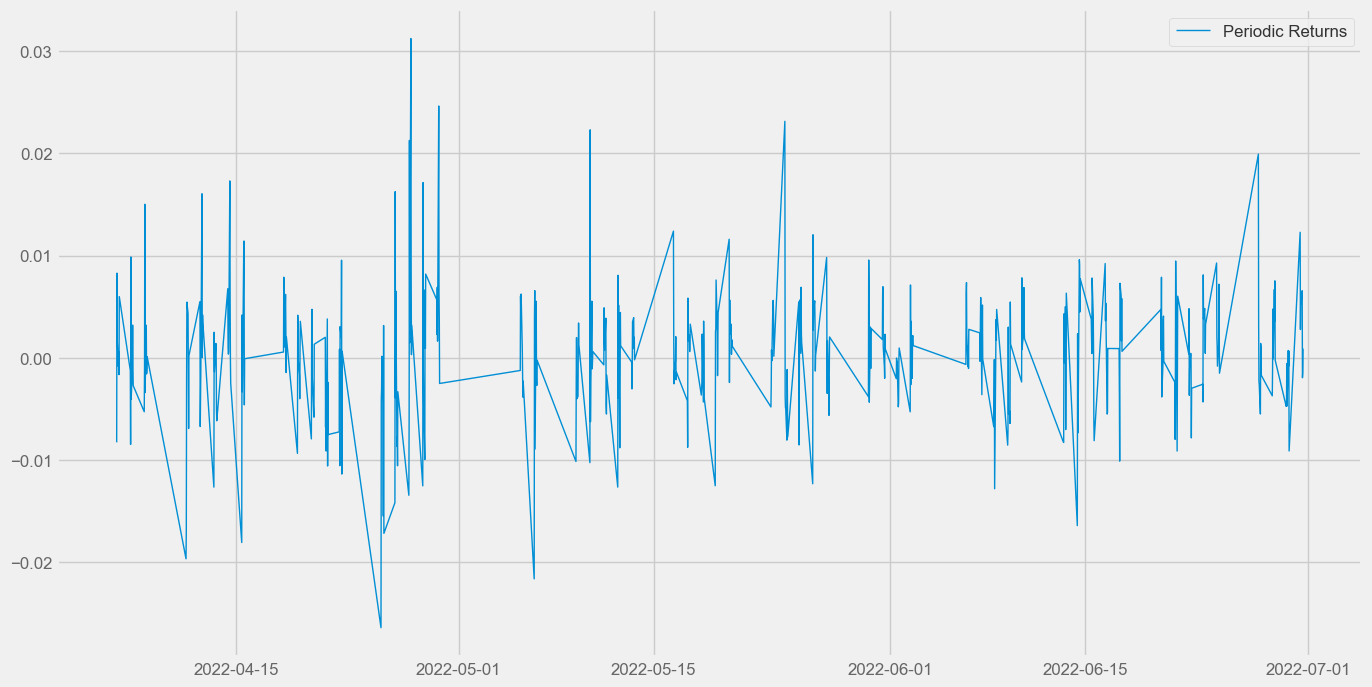

In [151]:
plt.figure(figsize=(15,8))
plt.plot(daily_return_df_f3['daily_R'], linewidth =1, label = 'Periodic Returns')
plt.legend()
plt.grid(True)

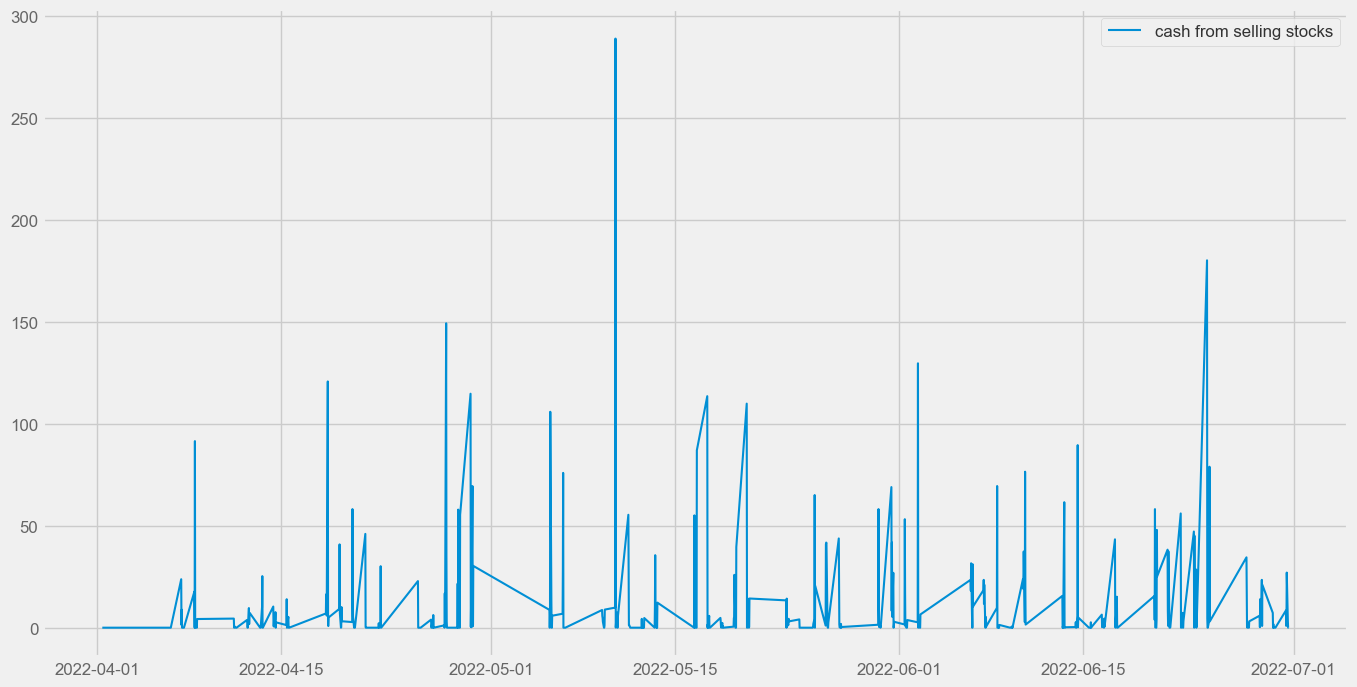

In [152]:
plt.figure(figsize=(15,8))
plt.plot(backtest_insample_results_f3['cash_from_selling'], linewidth =1.5, label = 'cash from selling stocks')
plt.legend()
plt.grid(True)

In [240]:
print("Current holdings in market worth: ",round(backtest_insample_results_f3['fund_value'][-1],2)  )
print("Total Cash collected from selling stocks ",round(backtest_insample_results_f3['cash_from_selling'].sum(),2)  )
print("Total amt invested about: ",total_amt_invested_f3[-1]-100, "-first few days for no signal daily fund is not invested.")
print("How much we made?: ", round(( ((backtest_insample_results_f3['fund_value'][-1] + backtest_insample_results_f3['cash_from_selling'].sum())/(total_amt_invested_f3[-1]-100)-1) )* 100,2),"%")
print("average of periodic returns: ", round(daily_return_df_f3['daily_R'].mean()*100,2))
print( "std dev of periodic returns: ", round(daily_return_df_f3['daily_R'].std(),2))
print("mean to std dev ratio: ", round(daily_return_df_f3['daily_R'].mean()/daily_return_df_f3['daily_R'].std(),2))

Current holdings in market worth:  859.28
Total Cash collected from selling stocks  5057.08
Total amt invested about:  5800 -first few days for no signal daily fund is not invested.
How much we made?:  2.01 %
average of periodic returns:  0.03
std dev of periodic returns:  0.01
mean to std dev ratio:  0.04


### Evaluation and Improvements
* positive returns!  and best return/risk so far.
* We need to check if we are missing on winning trades to get more returns/better results. Also we can check if are closing out too early and losing on earnings? 

### Test-Out Sample

In [154]:
fund_value_f3_o, total_amt_invested_f3_o, cash_from_selling_f3_o, daily_trades_f3_o, live_stock_inventory_f3_o  = backtesting_feature(data_f3_outsample , backtest_timeperiod_outsample )
daily_trades_record = pd.concat(daily_trades_f3_o)
datetime_index = pd.to_datetime(backtest_timeperiod_outsample, format='%Y%m%d%H%M%S%f')
backtest_outsample_results_f3_o = pd.DataFrame({'fund_value':fund_value_f3_o,
                                          'total_amt_invested':total_amt_invested_f3_o,
                                          'cash_from_selling':cash_from_selling_f3_o,
                                          }, index=datetime_index)
backtest_outsample_results_f3_o.index.name = 'time'

print("Total amt invested: ",total_amt_invested_f3_o[-1] )
print("Final amount", backtest_outsample_results_f3_o['fund_value'][-1] + backtest_outsample_results_f3_o['cash_from_selling'].sum())
print("How much we made?: ", round(( ((backtest_outsample_results_f3_o['fund_value'][-1] + backtest_outsample_results_f3_o['cash_from_selling'].sum())/total_amt_invested_f3_o[-1]-1) )* 100,2),"%")


Backtesting Progress:   0%|          | 0/168 [00:00<?, ?it/s]

Backtesting Progress: 100%|██████████| 168/168 [00:02<00:00, 78.38it/s]

Total amt invested:  2100
Final amount 2104.264516425933
How much we made?:  0.2 %


## Feature 4
* Our feature is Harmonic Mean and +/2 StdDev bands around it

In [196]:
#create features for our strategy 
window = 8
harmonic_mean_period = 8
temp = []
for i in tqdm(data_final['code'].unique().tolist(), desc='Progress: '):
    stock = data_final[data_final['code'] == i].copy()

    stock['HarmonicMean'] = harmonic_mean_period / (1 / stock['close']).rolling(window=harmonic_mean_period).sum()
    stock['Upper_Band'] = stock['HarmonicMean'] + stock['close'].rolling(window=window).std()*2
    stock['Lower_Band'] = stock['HarmonicMean'] - stock['close'].rolling(window=window).std()*2
    

    temp.append(stock)
data_f4 = pd.concat(temp) 
data_f4.set_index(['time'],inplace=True) 
data_f4

Progress: 100%|██████████| 495/495 [00:08<00:00, 56.54it/s]


,date,code,open,high,low,close,volume,amount,adjustflag,HarmonicMean,Upper_Band,Lower_Band
time,,,,,,,,,,,,
20220401100000000,2022-04-01,sh.600006,5.45,5.45,5.40,5.43,2019505.0,10960302.0000,3,NaN,NaN,NaN
20220401103000000,2022-04-01,sh.600006,5.43,5.47,5.43,5.46,983100.0,5359361.0000,3,NaN,NaN,NaN
20220401110000000,2022-04-01,sh.600006,5.46,5.48,5.43,5.46,854700.0,4667252.0000,3,NaN,NaN,NaN
20220401113000000,2022-04-01,sh.600006,5.46,5.47,5.44,5.44,712300.0,3887314.0000,3,NaN,NaN,NaN
20220401133000000,2022-04-01,sh.600006,5.44,5.45,5.43,5.43,481100.0,2616551.0000,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20220729113000000,2022-07-29,sz.300699,70.34,70.69,70.00,70.07,553807.0,38977724.0000,3,69.744211,70.550184,68.938237
20220729133000000,2022-07-29,sz.300699,70.03,70.03,69.30,69.60,432687.0,30084125.0000,3,69.716694,70.526169,68.907219
20220729140000000,2022-07-29,sz.300699,69.70,69.96,69.60,69.75,243000.0,16955343.0000,3,69.720443,70.530222,68.910663


In [197]:
in_sample = []
out_sample = []
for i in tqdm(data_f4['code'].unique().tolist(), desc='Progress: '):
    stock = data_f4[data_f4['code']==i]
    in_sample.append(stock[:'20220630150000000'])
    out_sample.append(stock['20220701100000000':])
data_f4_insample = pd.concat(in_sample)
data_f4_outsample = pd.concat(out_sample)
print(data_f4_insample.shape[0] + data_f4_outsample.shape[0])

Progress:   0%|          | 0/495 [00:00<?, ?it/s]

Progress: 100%|██████████| 495/495 [00:07<00:00, 62.15it/s]

316656


In [198]:
fund_value_f4, total_amt_invested_f4, cash_from_selling_f4, daily_trades_f4, live_stock_inventory_f4  = backtesting_feature(data_f4_insample, backtest_timeperiod_insample)
daily_trades_record_f4 = pd.concat(daily_trades_f4)

Backtesting Progress:   0%|          | 0/472 [00:00<?, ?it/s]

Backtesting Progress: 100%|██████████| 472/472 [00:09<00:00, 48.27it/s]


In [213]:
datetime_index = pd.to_datetime(backtest_timeperiod_insample, format='%Y%m%d%H%M%S%f')
backtest_insample_results_f4 = pd.DataFrame({'fund_value':fund_value_f4,
                                          'total_amt_invested':total_amt_invested_f4,
                                          'cash_from_selling':cash_from_selling_f4,
                                          }, index=datetime_index)
backtest_insample_results_f4.index.name = 'time'
backtest_insample_results_f4.head(15)

,fund_value,total_amt_invested,cash_from_selling
time,,,
2022-04-01 10:00:00,0.000000,100,0.0
2022-04-01 10:30:00,0.000000,100,0.0
2022-04-01 11:00:00,0.000000,100,0.0
2022-04-01 11:30:00,0.000000,100,0.0
2022-04-01 13:30:00,0.000000,100,0.0
2022-04-01 14:00:00,0.000000,100,0.0
2022-04-01 14:30:00,0.000000,100,0.0
2022-04-01 15:00:00,0.000000,100,0.0
2022-04-06 10:00:00,100.000000,200,0.0


In [200]:
daily_return_df_f4 = calculate_daily_returns(backtest_insample_results_f4)
daily_return_df_f4

,daily_R,p,t
time,,,
2022-04-06 10:30:00,-0.014959,100.000000,98.504128
2022-04-06 11:00:00,0.002731,98.504128,98.773182
2022-04-06 11:30:00,-0.000532,98.773182,98.720603
2022-04-06 13:30:00,-0.001437,98.720603,98.578698
2022-04-06 14:00:00,-0.001655,98.578698,98.415594
...,...,...,...
2022-06-30 11:30:00,0.005691,502.306037,505.164659
2022-06-30 13:30:00,0.010150,499.189178,504.255845
2022-06-30 14:00:00,-0.002635,499.860139,498.543165


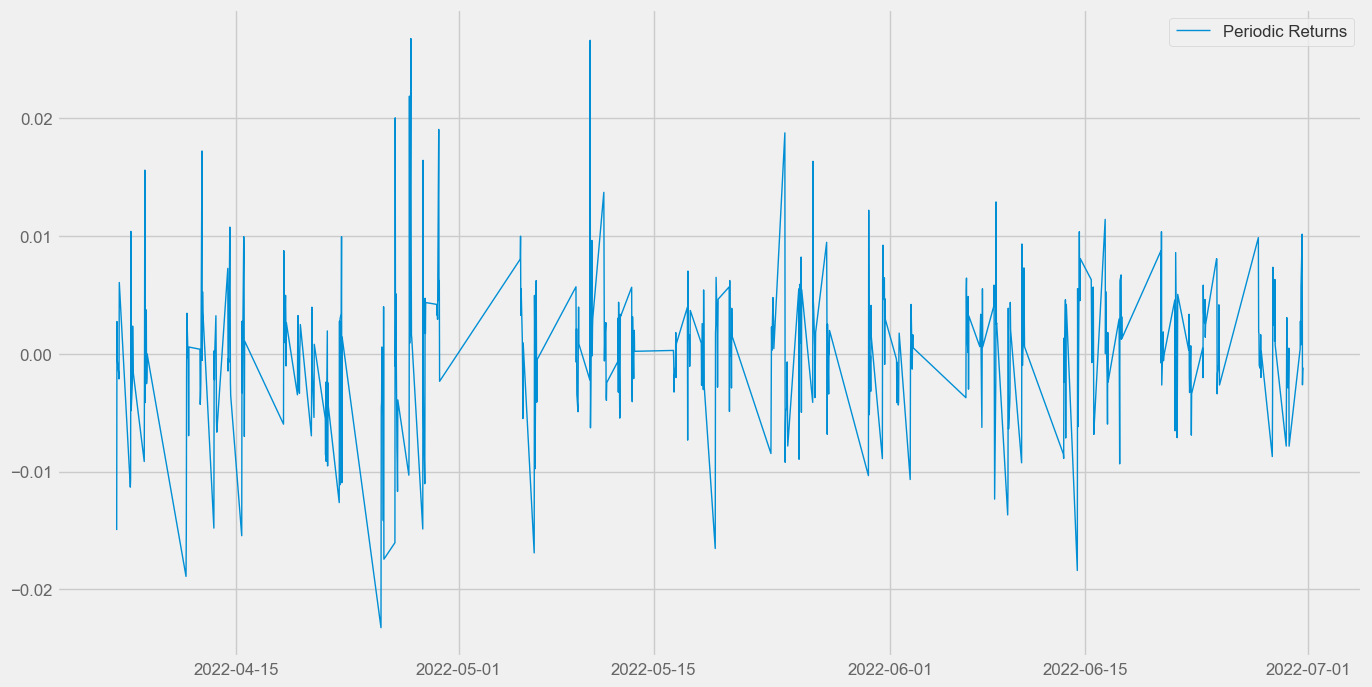

In [201]:
plt.figure(figsize=(15,8))
plt.plot(daily_return_df_f4['daily_R'], linewidth =1, label = 'Periodic Returns')
plt.legend()
plt.grid(True)

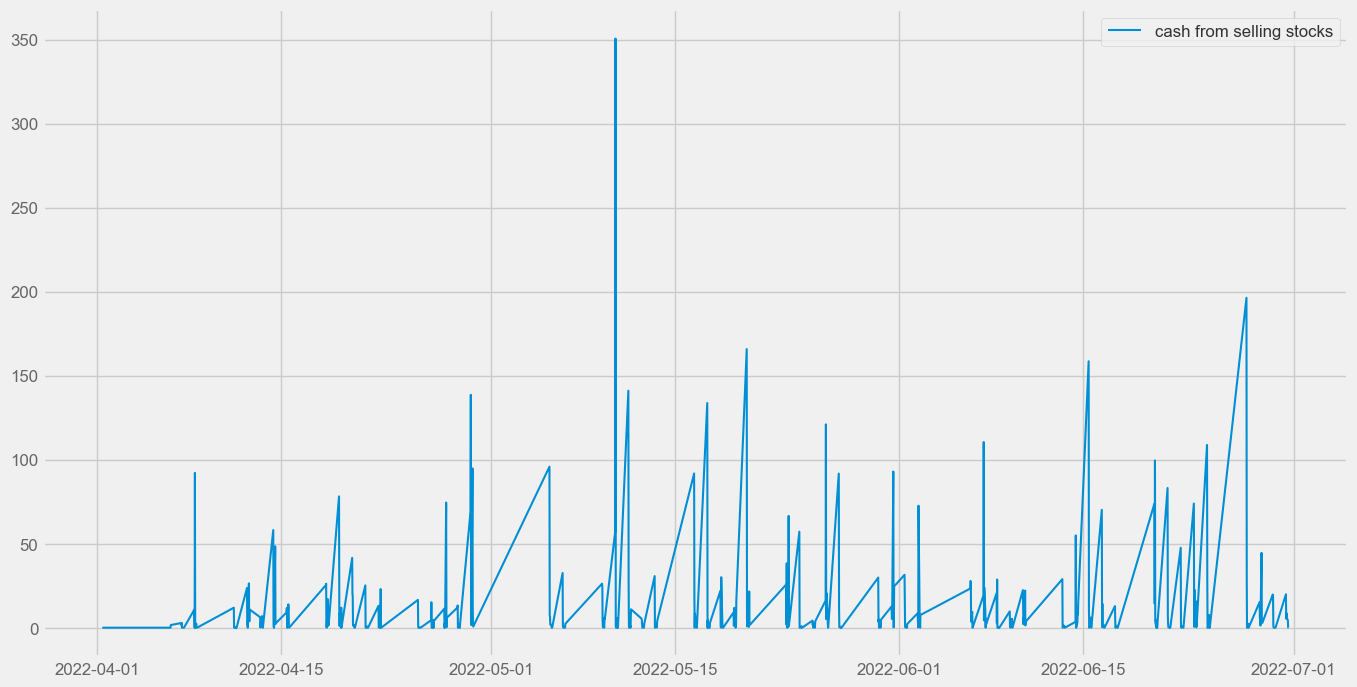

In [202]:
plt.figure(figsize=(15,8))
plt.plot(backtest_insample_results_f4['cash_from_selling'], linewidth =1.5, label = 'cash from selling stocks')
plt.legend()
plt.grid(True)

In [241]:
print("Current holdings in market worth: ",round(backtest_insample_results_f4['fund_value'][-1],2)  )
print("Total Cash collected from selling stocks ",round(backtest_insample_results_f4['cash_from_selling'].sum(),2)  )
print("Total amt invested about: ",total_amt_invested_f4[-1]-100, "-first few days for no signal daily fund is not invested. " )
print("How much we made?: ", round(( ((backtest_insample_results_f4['fund_value'][-1] + backtest_insample_results_f4['cash_from_selling'].sum())/(total_amt_invested_f4[-1]-100)-1) )* 100,2),"%")
print("average of periodic returns: ", round(daily_return_df_f4['daily_R'].mean()*100,2))
print( "std dev of periodic returns: ", round(daily_return_df_f4['daily_R'].std(),2))
print("mean to std dev ratio: ", round(daily_return_df_f4['daily_R'].mean()/daily_return_df_f4['daily_R'].std(),2))

Current holdings in market worth:  496.94
Total Cash collected from selling stocks  5361.54
Total amt invested about:  5800 -first few days for no signal daily fund is not invested. 
How much we made?:  1.01 %
average of periodic returns:  0.01
std dev of periodic returns:  0.01
mean to std dev ratio:  0.01


### Evaluation and Improvements
* similar thoughts as that of previous features. 

### Test Out-Sample


In [204]:
fund_value_f4_o, total_amt_invested_f4_o, cash_from_selling_f4_o, daily_trades_f4_o, live_stock_inventory_f4_o  = backtesting_feature(data_f4_outsample , backtest_timeperiod_outsample )
daily_trades_record = pd.concat(daily_trades_f4_o)
datetime_index = pd.to_datetime(backtest_timeperiod_outsample, format='%Y%m%d%H%M%S%f')
backtest_outsample_results_f4_o = pd.DataFrame({'fund_value':fund_value_f4_o,
                                          'total_amt_invested':total_amt_invested_f4_o,
                                          'cash_from_selling':cash_from_selling_f4_o,
                                          }, index=datetime_index)
backtest_outsample_results_f4_o.index.name = 'time'

print("Total amt invested: ",total_amt_invested_f4_o[-1] )
print("Final amount", backtest_outsample_results_f4_o['fund_value'][-1] + backtest_outsample_results_f4_o['cash_from_selling'].sum())
print("How much we made?: ", round(( ((backtest_outsample_results_f4_o['fund_value'][-1] + backtest_outsample_results_f4_o['cash_from_selling'].sum())/total_amt_invested_f4_o[-1]-1) )* 100,2),"%")


Backtesting Progress:   0%|          | 0/168 [00:00<?, ?it/s]

Backtesting Progress: 100%|██████████| 168/168 [00:01<00:00, 88.82it/s]

Total amt invested:  2100
Final amount 2095.332713203012
How much we made?:  -0.22 %


## Feature 5
* Our feature is Exponential moving average and calculate +/- 2StdDev bands around it to get buy/sell signals

In [218]:
#create features for our strategy 
window = 8
buy_sigma_multiplier =2
sell_sigma_multiplier =2
temp = []
for i in tqdm(data_final['code'].unique().tolist(), desc='Progress: '):
    stock = data_final[data_final['code'] == i].copy()
    stock['EMA'] = stock['close'].ewm(span=window, adjust=False).mean()
    stock['Upper_Band'] = stock['EMA'] + stock['close'].rolling(window=window).std()*sell_sigma_multiplier
    stock['Lower_Band'] = stock['EMA'] - stock['close'].rolling(window=window).std()*buy_sigma_multiplier

    temp.append(stock)
data_f5 = pd.concat(temp) 
data_f5.set_index(['time'],inplace=True) 
data_f5

Progress: 100%|██████████| 495/495 [00:08<00:00, 56.59it/s]


,date,code,open,high,low,close,volume,amount,adjustflag,EMA,Upper_Band,Lower_Band
time,,,,,,,,,,,,
20220401100000000,2022-04-01,sh.600006,5.45,5.45,5.40,5.43,2019505.0,10960302.0000,3,5.430000,NaN,NaN
20220401103000000,2022-04-01,sh.600006,5.43,5.47,5.43,5.46,983100.0,5359361.0000,3,5.436667,NaN,NaN
20220401110000000,2022-04-01,sh.600006,5.46,5.48,5.43,5.46,854700.0,4667252.0000,3,5.441852,NaN,NaN
20220401113000000,2022-04-01,sh.600006,5.46,5.47,5.44,5.44,712300.0,3887314.0000,3,5.441440,NaN,NaN
20220401133000000,2022-04-01,sh.600006,5.44,5.45,5.43,5.43,481100.0,2616551.0000,3,5.438898,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20220729113000000,2022-07-29,sz.300699,70.34,70.69,70.00,70.07,553807.0,38977724.0000,3,69.729506,70.535479,68.923533
20220729133000000,2022-07-29,sz.300699,70.03,70.03,69.30,69.60,432687.0,30084125.0000,3,69.700727,70.510202,68.891252
20220729140000000,2022-07-29,sz.300699,69.70,69.96,69.60,69.75,243000.0,16955343.0000,3,69.711677,70.521456,68.901897


In [165]:
in_sample = []
out_sample = []
for i in tqdm(data_f5['code'].unique().tolist(), desc='Progress: '):
    stock = data_f5[data_f5['code']==i]
    in_sample.append(stock[:'20220630150000000'])
    out_sample.append(stock['20220701100000000':])
data_f5_insample = pd.concat(in_sample)
data_f5_outsample = pd.concat(out_sample)
print(data_f5_insample.shape[0] + data_f5_outsample.shape[0])

Progress:   0%|          | 0/495 [00:00<?, ?it/s]

Progress: 100%|██████████| 495/495 [00:08<00:00, 60.66it/s]


316656


In [166]:
fund_value_f5, total_amt_invested_f5, cash_from_selling_f5, daily_trades_f5, live_stock_inventory_f5  = backtesting_feature(data_f5_insample, backtest_timeperiod_insample)
daily_trades_record_f5 = pd.concat(daily_trades_f5)

Backtesting Progress: 100%|██████████| 472/472 [00:09<00:00, 49.76it/s]


In [215]:
datetime_index = pd.to_datetime(backtest_timeperiod_insample, format='%Y%m%d%H%M%S%f')
backtest_insample_results_f5 = pd.DataFrame({'fund_value':fund_value_f5,
                                          'total_amt_invested':total_amt_invested_f5,
                                          'cash_from_selling':cash_from_selling_f5,
                                          }, index=datetime_index)
backtest_insample_results_f5.index.name = 'time'
backtest_insample_results_f5.head(15)

,fund_value,total_amt_invested,cash_from_selling
time,,,
2022-04-01 10:00:00,0.000000,100,0.0
2022-04-01 10:30:00,0.000000,100,0.0
2022-04-01 11:00:00,0.000000,100,0.0
2022-04-01 11:30:00,0.000000,100,0.0
2022-04-01 13:30:00,0.000000,100,0.0
2022-04-01 14:00:00,0.000000,100,0.0
2022-04-01 14:30:00,0.000000,100,0.0
2022-04-01 15:00:00,0.000000,100,0.0
2022-04-06 10:00:00,100.000000,200,0.0


In [168]:
daily_return_df_f5 = calculate_daily_returns(backtest_insample_results_f5)
daily_return_df_f5

,daily_R,p,t
time,,,
2022-04-06 10:30:00,-0.006239,100.000000,99.376082
2022-04-06 11:00:00,0.013475,99.376082,100.715160
2022-04-06 11:30:00,0.006605,100.715160,101.380343
2022-04-06 13:30:00,-0.001637,101.380343,101.214339
2022-04-06 14:00:00,0.002778,101.214339,101.495538
...,...,...,...
2022-06-30 11:30:00,0.007477,983.850056,991.206364
2022-06-30 13:30:00,0.010121,991.206364,1001.237932
2022-06-30 14:00:00,-0.002547,1001.237932,998.688014


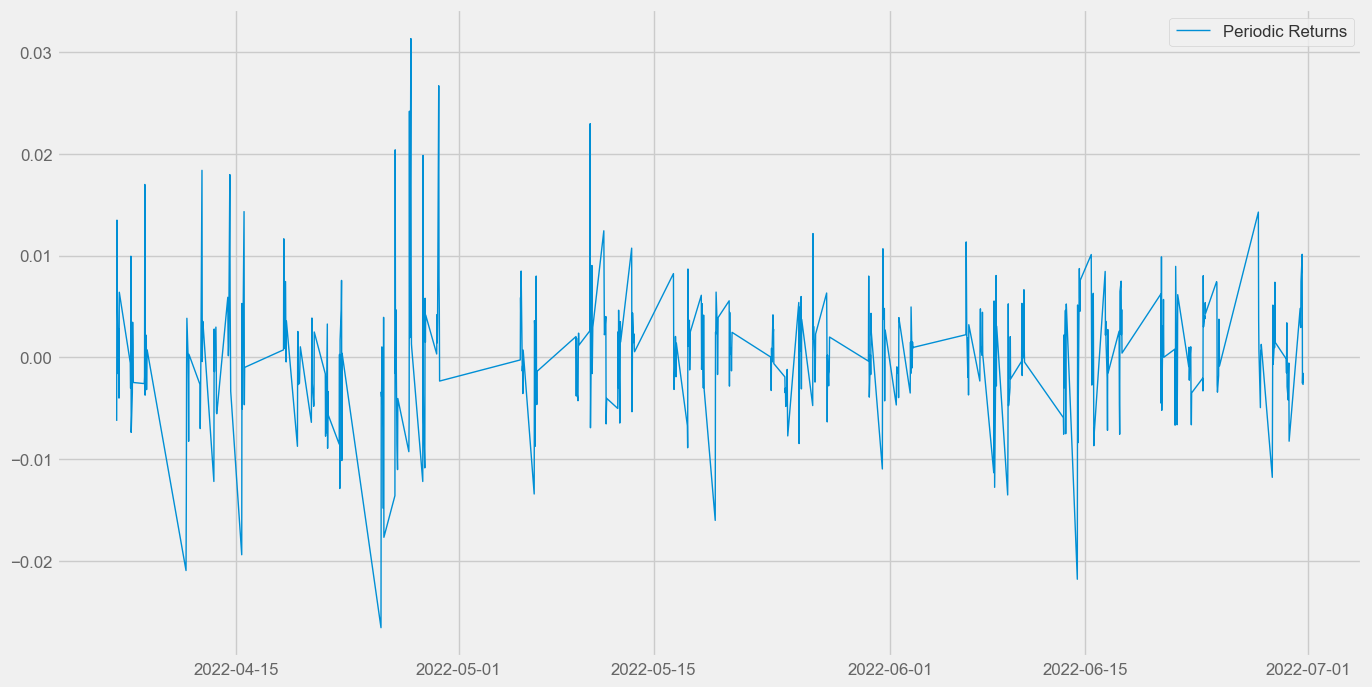

In [169]:
plt.figure(figsize=(15,8))
plt.plot(daily_return_df_f5['daily_R'], linewidth =1, label = 'Periodic Returns')
plt.legend()
plt.grid(True)

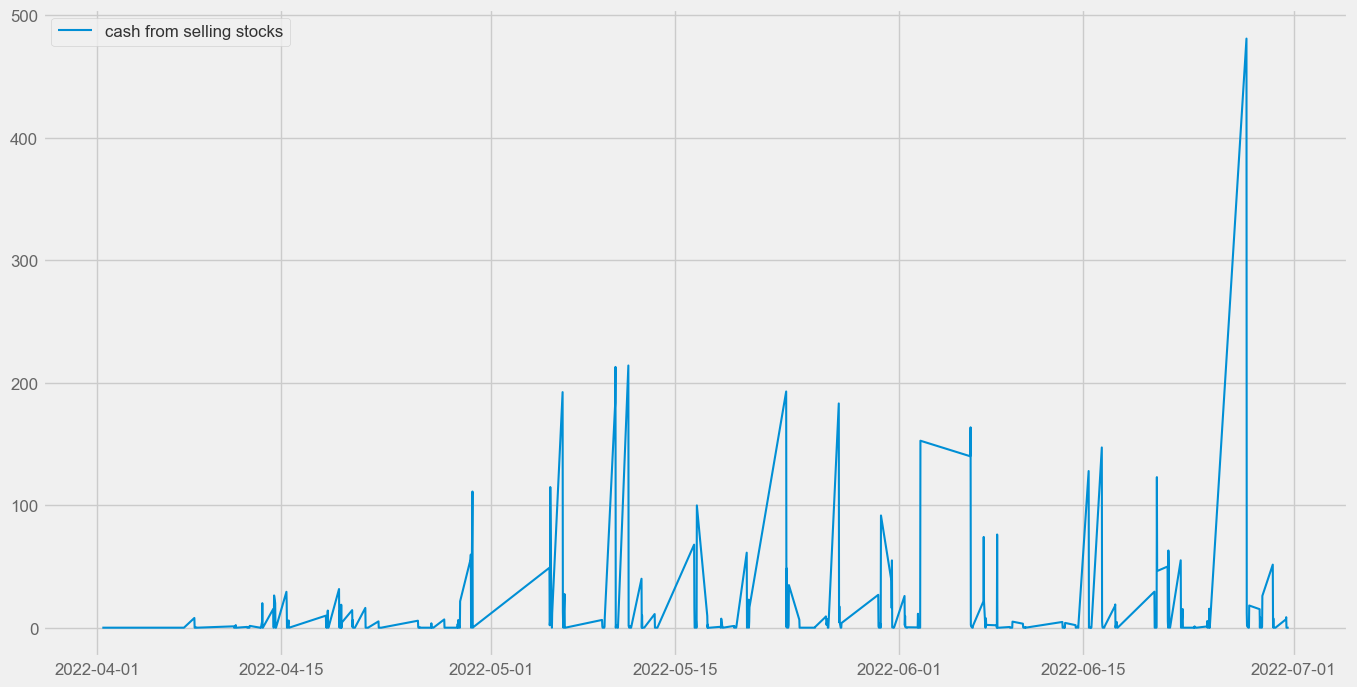

In [170]:
plt.figure(figsize=(15,8))
plt.plot(backtest_insample_results_f5['cash_from_selling'], linewidth =1.5, label = 'cash from selling stocks')
plt.legend()
plt.grid(True)

In [242]:
print("Current holdings in market worth: ",round(backtest_insample_results_f5['fund_value'][-1],2)  )
print("Total Cash collected from selling stocks ",round(backtest_insample_results_f5['cash_from_selling'].sum(),2)  )
print("Total amt invested about: ",total_amt_invested_f5[-1]-100, "-first few days for no signal daily fund is not invested. " )
print("How much we made?: ", round(((backtest_insample_results_f5['fund_value'][-1] + backtest_insample_results_f5['cash_from_selling'].sum()) / (total_amt_invested_f5[-1]-100)-1) * 100,2),"%")
print("average of periodic returns: ", round(daily_return_df_f5['daily_R'].mean()*100,2))
print( "std dev of periodic returns: ", round(daily_return_df_f5['daily_R'].std(),2))
print("mean to std dev ratio: ", round(daily_return_df_f5['daily_R'].mean()/daily_return_df_f5['daily_R'].std(),2))

Current holdings in market worth:  994.44
Total Cash collected from selling stocks  4945.28
Total amt invested about:  5800 -first few days for no signal daily fund is not invested. 
How much we made?:  2.41 %
average of periodic returns:  0.02
std dev of periodic returns:  0.01
mean to std dev ratio:  0.03


* Best Returns so far 

### Test Out-Sample

In [172]:
fund_value_f5_o, total_amt_invested_f5_o, cash_from_selling_f5_o, daily_trades_f5_o, live_stock_inventory_f5_o  = backtesting_feature(data_f5_outsample , backtest_timeperiod_outsample )
daily_trades_record = pd.concat(daily_trades_f5_o)
datetime_index = pd.to_datetime(backtest_timeperiod_outsample, format='%Y%m%d%H%M%S%f')
backtest_outsample_results_f5_o = pd.DataFrame({'fund_value':fund_value_f5_o,
                                          'total_amt_invested':total_amt_invested_f5_o,
                                          'cash_from_selling':cash_from_selling_f5_o,
                                          }, index=datetime_index)
backtest_outsample_results_f5_o.index.name = 'time'

print("Total amt invested: ",total_amt_invested_f5_o[-1] )
print("Final amount", backtest_outsample_results_f5_o['fund_value'][-1] + backtest_outsample_results_f5_o['cash_from_selling'].sum())
print("How much we made?: ", round(( ((backtest_outsample_results_f5_o['fund_value'][-1] + backtest_outsample_results_f5_o['cash_from_selling'].sum())/total_amt_invested_f5_o[-1]-1) )* 100,2),"%")


Backtesting Progress: 100%|██████████| 168/168 [00:02<00:00, 76.06it/s]

Total amt invested:  2100
Final amount 2100.5562290500607
How much we made?:  0.03 %


### Common thoughts on Evaluation and  Improvements
* We can try allocation of weights in exponential manner. So that the stocks which is fartherst from given band/threshold gets significantly more funds
* Its tedious to test different value and combination of paramters manually. Then keeping record for all those is another challenge. It will be easier to get best params if we have a code to test all combination given range for the params. Similar to how hyperparam tuning works in ML. We just need to be careful we dont overfit.
* Should get into buy sell signals for each stocks. And calculate percentage of signal that actually resulted in a profitable trade


## Thank You! :)